<a href="https://colab.research.google.com/github/GuilhermePiresOliveira/Previsao-de-Desempenho-Academico/blob/main/Regress%C3%A3o_linear_p_desenvolvimento_acad%C3%AAmico(FINAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

▪ *Em resumo, Demonstro uma aplicação prática de machine learning na área da educação.*

▪ *A predição da nota de um exame pode ser uma ferramenta útil para personalizar o ensino e melhorar o desempenho dos estudantes.*



---



---



> ### **Importação das bibliotecas necessárias** 📜

In [ ]:
import pandas as pd  # Importa a biblioteca Pandas para manipulação e análise de dados
import numpy as np  # Importa a biblioteca NumPy para operações numéricas e matriciais
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para visualização de dados
import seaborn as sns  # Importa a biblioteca Seaborn para visualização e dados estatísticos
from sklearn.model_selection import train_test_split  # Importa a função para dividir o conjunto de dados em treinamento e teste
from sklearn.linear_model import LinearRegression  # Importa o modelo de regressão linear
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler  # Importa técnicas de pré-processamento de dados
from sklearn.compose import ColumnTransformer  # Importa a ferramenta para aplicar transformações a colunas específicas
from sklearn.metrics import mean_squared_error  # Importa a métrica para avaliar o desempenho do modelo
import plotly.express as px  # Importa a biblioteca Plotly para visualização interativa de dados
import statsmodels.api as sm  # Importa a biblioteca Statsmodels para análise estatística



---



---



> # ***Pré-processamento de dados*** 📐

***Importando o Dataset***

In [ ]:
url = "https://raw.githubusercontent.com/GuilhermePiresOliveira/Datasets/refs/heads/main/StudentPerformanceFactors.csv"



---



***Lendo o Dataset***

In [ ]:
df = pd.read_csv(url)



---



***Visualização***

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70




---



***Excluindo essas colunas porque são ambiguas e desnecessarias***

In [ ]:
df = df.drop(['Gender', 'Peer_Influence', 'Internet_Access'], axis=1)



---



***Traduzindo as colunas***

In [ ]:
colunas_traduzidas = {
    'Hours_Studied': 'Horas_Estudadas',
    'Attendance': 'Frequencia',
    'Parental_Involvement': 'Envolvimento_Parental',
    'Access_to_Resources': 'Acesso_a_Recursos',
    'Extracurricular_Activities': 'Atividades_Extracurriculares',
    'Sleep_Hours': 'Horas_de_Sono',
    'Previous_Scores': 'Notas_Anteriores',
    'Motivation_Level': 'Nivel_de_Motivacao',
    'Tutoring_Sessions': 'Sessoes_de_Tutoria',
    'Family_Income': 'Renda_Familiar',
    'Teacher_Quality': 'Qualidade_do_Professor',
    'School_Type': 'Tipo_de_Escola',
    'Physical_Activity': 'Atividade_Fisica',
    'Learning_Disabilities': 'Deficiencias_de_Aprendizagem',
    'Parental_Education_Level': 'Nivel_de_Educacao_dos_Pais',
    'Distance_from_Home': 'Distancia_de_Casa',
    'Exam_Score': 'Nota_no_Exame'
}

In [ ]:
df_br = df.rename(columns=colunas_traduzidas)



---



***Visualizando com a colunas traduzidas***

In [ ]:
df_br.head()

,Horas_Estudadas,Frequencia,Envolvimento_Parental,Acesso_a_Recursos,Atividades_Extracurriculares,Horas_de_Sono,Notas_Anteriores,Nivel_de_Motivacao,Sessoes_de_Tutoria,Renda_Familiar,Qualidade_do_Professor,Tipo_de_Escola,Atividade_Fisica,Deficiencias_de_Aprendizagem,Nivel_de_Educacao_dos_Pais,Distancia_de_Casa,Nota_no_Exame
0,23,84,Low,High,No,7,73,Low,0,Low,Medium,Public,3,No,High School,Near,67
1,19,64,Low,Medium,No,8,59,Low,2,Medium,Medium,Public,4,No,College,Moderate,61
2,24,98,Medium,Medium,Yes,7,91,Medium,2,Medium,Medium,Public,4,No,Postgraduate,Near,74
3,29,89,Low,Medium,Yes,8,98,Medium,1,Medium,Medium,Public,4,No,High School,Moderate,71
4,19,92,Medium,Medium,Yes,6,65,Medium,3,Medium,High,Public,4,No,College,Near,70




---



---



> # ***Tratamento de Dados*** 📐

***Verificando se existem valores errados ou nulos***

In [ ]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Horas_Estudadas               6607 non-null   int64 
 1   Frequencia                    6607 non-null   int64 
 2   Envolvimento_Parental         6607 non-null   object
 3   Acesso_a_Recursos             6607 non-null   object
 4   Atividades_Extracurriculares  6607 non-null   object
 5   Horas_de_Sono                 6607 non-null   int64 
 6   Notas_Anteriores              6607 non-null   int64 
 7   Nivel_de_Motivacao            6607 non-null   object
 8   Sessoes_de_Tutoria            6607 non-null   int64 
 9   Renda_Familiar                6607 non-null   object
 10  Qualidade_do_Professor        6529 non-null   object
 11  Tipo_de_Escola                6607 non-null   object
 12  Atividade_Fisica              6607 non-null   int64 
 13  Deficiencias_de_Ap



---



***O método .isna() no Pandas é utilizado para identificar valores ausentes (NaN - Not a Number) em um DataFrame.***

In [ ]:
df_br.isna().sum() #Contando os valores NULOS em cada coluna

,0
Horas_Estudadas,0
Frequencia,0
Envolvimento_Parental,0
Acesso_a_Recursos,0
Atividades_Extracurriculares,0
Horas_de_Sono,0
Notas_Anteriores,0
Nivel_de_Motivacao,0
Sessoes_de_Tutoria,0
Renda_Familiar,0




---



> ## ***Preenchendo Valores Nulos com medida estatística moda***

*O método fillna() no Pandas é utilizado para preencher valores ausentes (NaN - Not a Number) em um DataFrame.*

*O método mode() no Pandas é utilizada para encontrar a moda de um DataFrame.*

In [ ]:
# Encontrando a moda (valor mais frequente) da qualidade dos professores
moda_qualidade_professor = df_br['Qualidade_do_Professor'].mode()[0]

# Preenchendo os valores ausentes (NaN) na coluna de qualidade dos professores com a moda
df_br['Qualidade_do_Professor'] = df_br['Qualidade_do_Professor'].fillna(moda_qualidade_professor)

# Encontrando a moda do nível de escolaridade dos pais
moda_escolaridade_pais = df_br['Nivel_de_Educacao_dos_Pais'].mode()[0]

# Preenchendo os valores ausentes na coluna de escolaridade dos pais com a moda
df_br['Nivel_de_Educacao_dos_Pais'] = df_br['Nivel_de_Educacao_dos_Pais'].fillna(moda_escolaridade_pais)

# Encontrando a moda da distância da casa até a escola
moda_distancia = df_br['Distancia_de_Casa'].mode()[0]

# Preenchendo os valores ausentes na coluna de distância com a moda
df_br['Distancia_de_Casa'] = df_br['Distancia_de_Casa'].fillna(moda_distancia)



---



***Sem valores nulos agora***

In [ ]:
df_br.isna().sum()

,0
Horas_Estudadas,0
Frequencia,0
Envolvimento_Parental,0
Acesso_a_Recursos,0
Atividades_Extracurriculares,0
Horas_de_Sono,0
Notas_Anteriores,0
Nivel_de_Motivacao,0
Sessoes_de_Tutoria,0
Renda_Familiar,0


In [ ]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Horas_Estudadas               6607 non-null   int64 
 1   Frequencia                    6607 non-null   int64 
 2   Envolvimento_Parental         6607 non-null   object
 3   Acesso_a_Recursos             6607 non-null   object
 4   Atividades_Extracurriculares  6607 non-null   object
 5   Horas_de_Sono                 6607 non-null   int64 
 6   Notas_Anteriores              6607 non-null   int64 
 7   Nivel_de_Motivacao            6607 non-null   object
 8   Sessoes_de_Tutoria            6607 non-null   int64 
 9   Renda_Familiar                6607 non-null   object
 10  Qualidade_do_Professor        6607 non-null   object
 11  Tipo_de_Escola                6607 non-null   object
 12  Atividade_Fisica              6607 non-null   int64 
 13  Deficiencias_de_Ap



---



# ***Visualização dos Dados*** 📐

*Visualizando através de gráficos*

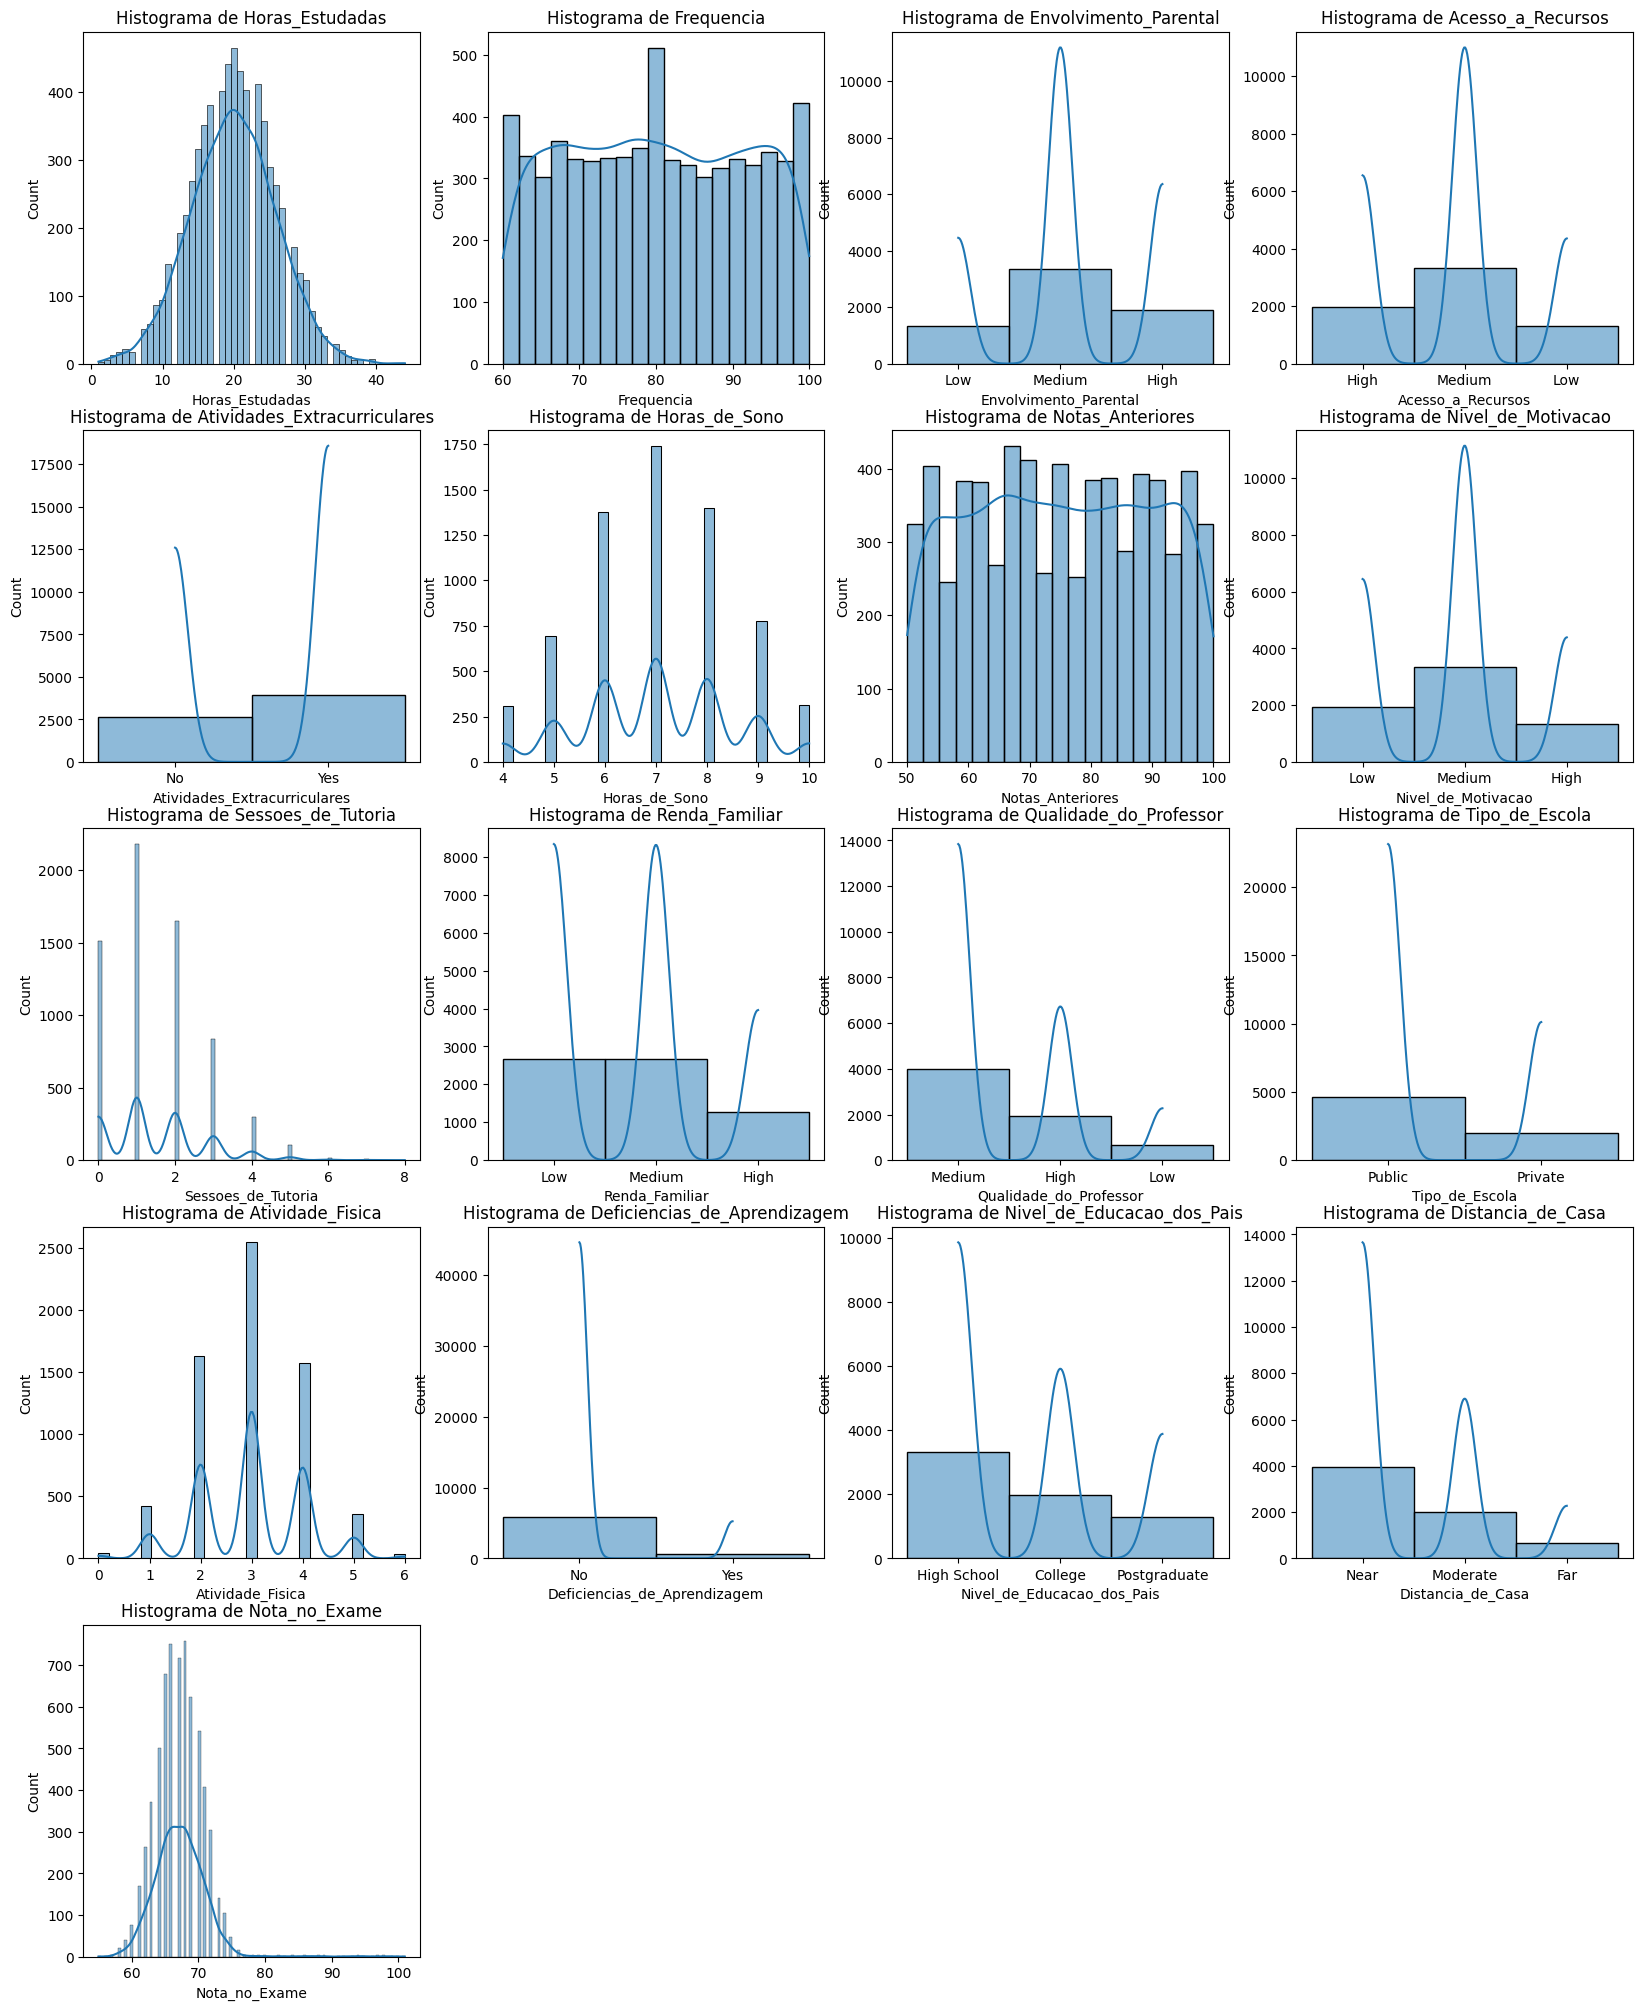

In [ ]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(df_br.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df_br[column], kde=True)
    plt.title(f'Histograma de {column}')
plt.show()



---



---



# ***Rotulando as colunas para treino*** 🔧

In [ ]:
columns = [
    'Atividades_Extracurriculares',
    'Tipo_de_Escola',
    'Deficiencias_de_Aprendizagem',
    'Envolvimento_Parental',
    'Acesso_a_Recursos',
    'Nivel_de_Motivacao',
    'Renda_Familiar',
    'Qualidade_do_Professor',
    'Atividade_Fisica',
    'Nivel_de_Educacao_dos_Pais',
    'Distancia_de_Casa'
]

*O LabelEncoder é uma ferramenta do scikit-learn em Python utilizada para transformar dados categóricos em valores numéricos.*

*Após executar esse código, as características categóricas em df_br serão substituídas por rótulos numéricos.*

In [ ]:
label_encoder = LabelEncoder()
for column in columns:
    df_br[column] = label_encoder.fit_transform(df_br[column])

In [ ]:
df_br.head()

,Horas_Estudadas,Frequencia,Envolvimento_Parental,Acesso_a_Recursos,Atividades_Extracurriculares,Horas_de_Sono,Notas_Anteriores,Nivel_de_Motivacao,Sessoes_de_Tutoria,Renda_Familiar,Qualidade_do_Professor,Tipo_de_Escola,Atividade_Fisica,Deficiencias_de_Aprendizagem,Nivel_de_Educacao_dos_Pais,Distancia_de_Casa,Nota_no_Exame
0,23,84,1,0,0,7,73,1,0,1,2,1,3,0,1,2,67
1,19,64,1,2,0,8,59,1,2,2,2,1,4,0,0,1,61
2,24,98,2,2,1,7,91,2,2,2,2,1,4,0,2,2,74
3,29,89,1,2,1,8,98,2,1,2,2,1,4,0,1,1,71
4,19,92,2,2,1,6,65,2,3,2,0,1,4,0,0,2,70




---



---



# ***Treinamento*** 🔧

In [ ]:
X = df_br.drop('Nota_no_Exame', axis=1)
y = df_br['Nota_no_Exame']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




---


---



> # ***Medições*** 🧭

*O coeficiente de determinação (R²) é uma métrica fundamental em modelos de regressão, indicando a proporção da variância da variável dependente que é explicada pelo modelo.*

In [ ]:
# Calcular o R²

from sklearn.metrics import r2_score

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinação (R²):", r2)

Coeficiente de Determinação (R²): 0.677563326803702




---



In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
print("Erro quadrático médio (MSE):", mse)

Erro quadrático médio (MSE): 4.430270635513555




---



---



# ***Correlação*** 📏

In [ ]:
corr = df_br.corr()

In [ ]:
corr['Horas_Estudadas']

,Horas_Estudadas
Horas_Estudadas,1.000000
Frequencia,-0.009908
Envolvimento_Parental,0.007207
Acesso_a_Recursos,-0.007909
Atividades_Extracurriculares,-0.006017
Horas_de_Sono,0.010977
Notas_Anteriores,0.024846
Nivel_de_Motivacao,0.022092
Sessoes_de_Tutoria,-0.014282
Renda_Familiar,0.010025




---



# ***Gráfico de Dispensão*** 📊

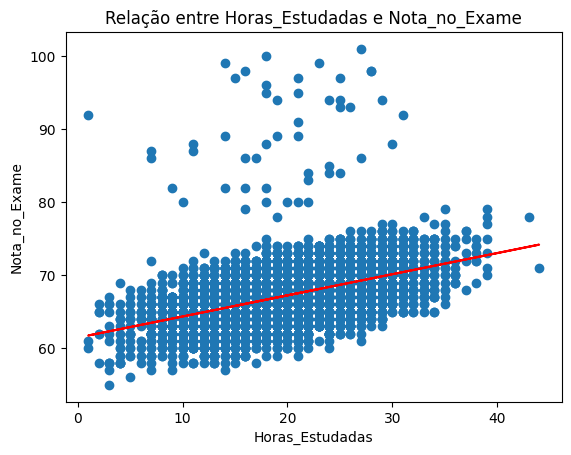

In [ ]:
# Adicionando uma coluna de 1s para o intercepto
df_br['intercept'] = 1

# Definindo as variáveis independentes (X) e dependente (y)
X = df_br[['intercept', 'Horas_Estudadas']]
y = df_br['Nota_no_Exame']

# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Criando o gráfico de dispersão
plt.scatter(df_br['Horas_Estudadas'], df_br['Nota_no_Exame'])
plt.title("Relação entre Horas_Estudadas e Nota_no_Exame")
plt.xlabel("Horas_Estudadas")
plt.ylabel("Nota_no_Exame")

# Adicionando a reta de regressão
plt.plot(df_br['Horas_Estudadas'], model.predict(X), color='red')

plt.show()



---



# ***Grafico de Dispensão Interrativo 📊***

In [ ]:
px.scatter(df_br, x = 'Horas_Estudadas', y = 'Nota_no_Exame', trendline_color_override="red", trendline = 'ols' )



---



---



# ***Estudo das Variáveis Disponíveis*** 🧪


- **Atividades_Extracurriculares:** *Variável categórica que indica a participação em atividades fora da escola.*

- **Tipo_de_Escola:** *Variável categórica que classifica o tipo de instituição de ensino.*

- **Deficiencias_de_Aprendizagem:** *Variável binária (sim/não) ou categórica (diversos tipos de deficiência).*

- **Envolvimento_Parental:** *Variável contínua ou categórica (baixo, médio, alto).*

- **Acesso_a_Recursos:** *Variável contínua (número de recursos) ou categórica (níveis de acesso).*

- **Nivel_de_Motivacao:** *Variável contínua (escala d
e 1 a 10) ou categórica (baixo, médio, alto).*

- **Renda_Familiar:** *Variável contínua (valor monetário).*

- **Qualidade_do_Professor:** *Variável contínua (escala de avaliação) ou categórica (boa, regular, ruim).*

- **Atividade_Fisica:** *Variável contínua (horas por semana) ou categórica (frequente, ocasional, rara).*

- **Nivel_de_Educacao_dos_Pais:** *Variável categórica (níveis de escolaridade).*

- **Distancia_de_Casa:** *Variável contínua (distância em km).*






---



---



In [ ]:
entrada_personalizada = np.array([
    [20,                 # Horas_Estudo (número)
     30,                 # Frequência (número)
     0,                  # Envolvimento_Parental (já codificado, 0 = baixo)
     0,                  # Acesso_a_Recursos (já codificado, 1 = bom)
     1,                  # Atividades_Extracurriculares (já codificado, 1 = participa)
     1,                  # Horas_de_Sono (número)
     60,                 # Notas_Anteriores (número)
     1,                  # Nível_de_Motivação (já codificado, 1 = alto)
     5,                  # Sessões_de_Tutoria (número)
     2,                  # Renda_Familiar (já codificado, 2 = média)
     1,                  # Qualidade_do_Professor (já codificado, 1 = alta)
     0,                  # Tipo_de_Escola (já codificado, 0 = pública)
     3,                  # Atividade_Física (número)
     0,                  # Dificuldades_de_Aprendizagem (já codificado, 0 = não tem)
     2,                  # Nível_de_Educação_dos_Pais (já codificado, 2 = universidade)
     2,                  # Distância_de_Casa (já codificado, 1 = perto)
    ]
])

predicao_notas= model_lr.predict(entrada_personalizada)

#Garante que a previsão esteja entre 0 e 100
nota_prevista = max(0, min(100, predicao_notas[0]))

print(f"Nota prevista no exame: {nota_prevista:.2f}")

Nota prevista no exame: 60.48


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names





---



---



# **Conclusão:** 📩

**Características Relevantes:** As características escolhidas para a predição são consideradas relevantes para o desempenho acadêmico, com base em pesquisas e estudos anteriores.

**Personalização:** O modelo permite fazer predições para estudantes individuais, considerando suas características específicas.

**Interpretação da Saída:** A nota prevista indica a probabilidade do
estudante obter aquela nota no exame, com base nas características fornecidas.



---



### *Fonte do Dados: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors*